In [216]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [217]:
df = pd.read_csv('demoo3.csv',error_bad_lines = False)
df.head()

,Company,Safety,average_rating,Total Rating Count
0,Turkish Airlines(Business Class),4,4.57,2095690
1,Turkish Airlines(First Class),4,4.49,2153167
2,Turkish Airlines(Preminium Class),4,4.42,6333
3,Turkish Airlines(Economy Class),4,4.56,2339585
4,Turkish Airlines(Second Class),4,4.78,41428


<AxesSubplot:xlabel='average_rating', ylabel='Company'>

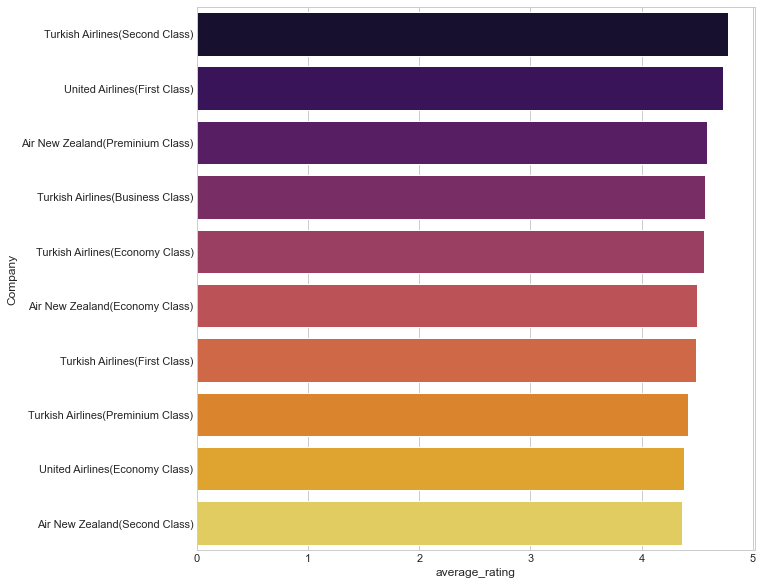

In [218]:
top_ten = df[df['Total Rating Count'] > 50]
top_ten.sort_values(by='average_rating', ascending=False)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10, 10))
data = top_ten.sort_values(by='average_rating', ascending=False).head(10)
sns.barplot(x="average_rating", y="Company", data=data, palette='inferno')

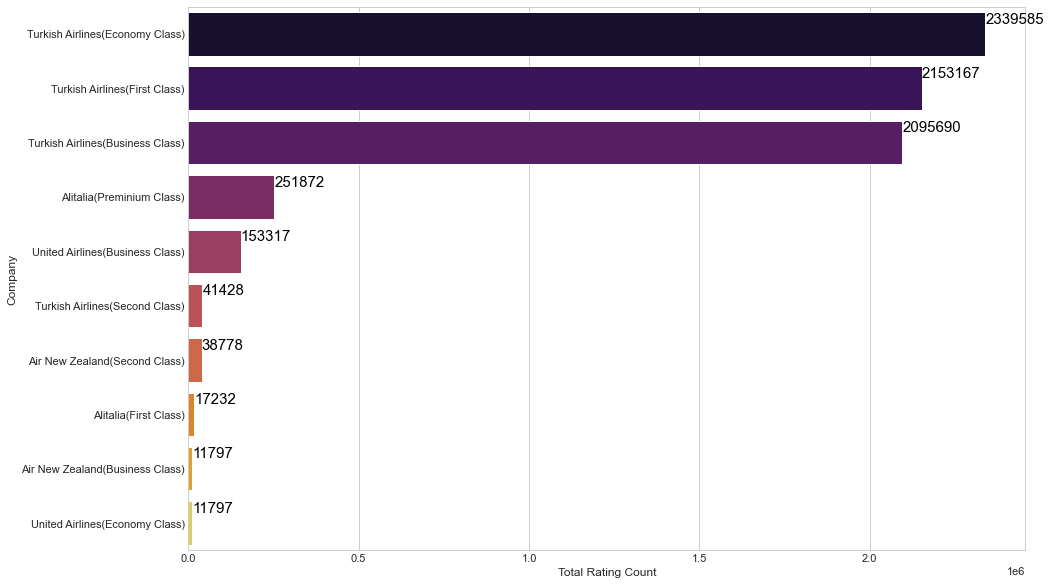

In [219]:
most_rated = df.sort_values('Total Rating Count', ascending = False).head(10).set_index('Company')
plt.figure(figsize=(15,10))
ax = sns.barplot(most_rated['Total Rating Count'], most_rated.index, palette = 'inferno')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

Text(0.5, 0, 'Average rating')

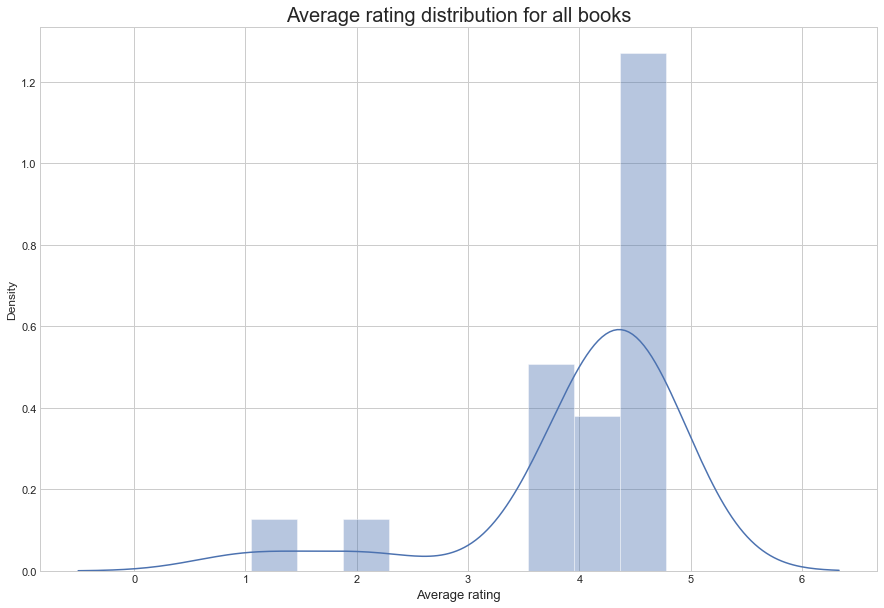

In [220]:
df.average_rating = df.average_rating.astype(float)
fig, ax = plt.subplots(figsize=[15,10])
sns.distplot(df['average_rating'],ax=ax)
ax.set_title('Average rating distribution for all books',fontsize=20)
ax.set_xlabel('Average rating',fontsize=13)

In [221]:
# ax = sns.relplot(data=df, x="average_rating", y="ratings_count", color = 'red', sizes=(100, 200), height=7, marker='o')
# plt.title("Relation between Rating counts and Average Ratings",fontsize = 15)
# ax.set_axis_labels("Average Rating", "Ratings Count")
df2 = df.copy()

In [222]:
df2.loc[ (df2['average_rating'] >= 0) & (df2['average_rating'] <= 1), 'rating_between'] = "between 0 and 1"
df2.loc[ (df2['average_rating'] > 1) & (df2['average_rating'] <= 2), 'rating_between'] = "between 1 and 2"
df2.loc[ (df2['average_rating'] > 2) & (df2['average_rating'] <= 3), 'rating_between'] = "between 2 and 3"
df2.loc[ (df2['average_rating'] > 3) & (df2['average_rating'] <= 4), 'rating_between'] = "between 3 and 4"
df2.loc[ (df2['average_rating'] > 4) & (df2['average_rating'] <= 5), 'rating_between'] = "between 4 and 5"

In [223]:
df2

,Company,Safety,average_rating,Total Rating Count,rating_between
0,Turkish Airlines(Business Class),4,4.57,2095690,between 4 and 5
1,Turkish Airlines(First Class),4,4.49,2153167,between 4 and 5
2,Turkish Airlines(Preminium Class),4,4.42,6333,between 4 and 5
3,Turkish Airlines(Economy Class),4,4.56,2339585,between 4 and 5
4,Turkish Airlines(Second Class),4,4.78,41428,between 4 and 5
5,United Airlines(Business Class),1,3.74,153317,between 3 and 4
6,United Airlines(First Class),3,4.73,55,between 4 and 5
7,United Airlines(Preminium Class),2,4.38,34,between 4 and 5
8,United Airlines(Economy Class),3,4.38,11797,between 4 and 5
9,United Airlines(Second Class),1,4.22,34,between 4 and 5


In [224]:
rating_df = pd.get_dummies(df2['rating_between'])
company_df = pd.get_dummies(df2['Company'])

In [225]:
features = pd.concat([rating_df, 
                      company_df, 
                      df2['average_rating'], 
                      df2['Total Rating Count']], axis=1)

In [226]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
features = min_max_scaler.fit_transform(features)

In [227]:

model = neighbors.NearestNeighbors(n_neighbors=10, algorithm='ball_tree')
model.fit(features)
dist, idlist = model.kneighbors(features)

In [228]:
def BookRecommender(book_name):
    book_list_name = []
    book_id = df2[df2['Company'] == book_name].index
    book_id = book_id[0]
    for newid in idlist[book_id]:
        book_list_name.append(df2.loc[newid].Company)
    return book_list_name
    
BookNames = BookRecommender('Turkish Airlines(Economy Class)')
BookNames

['Turkish Airlines(Economy Class)',
 'Turkish Airlines(First Class)',
 'Turkish Airlines(Business Class)',
 'Turkish Airlines(Second Class)',
 'Air New Zealand(Second Class)',
 'United Airlines(Economy Class)',
 'Turkish Airlines(Preminium Class)',
 'Air New Zealand(Economy Class)',
 'Air New Zealand(Preminium Class)',
 'United Airlines(First Class)']

In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [230]:
data = pd.read_csv("si2.csv")
data.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,Turkish Airlines,10,Zeshan Shah,6th May 2019,Ã¢Å“â€¦ Trip Verified | Flew on Turkish Airlin...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,Apr-19,4.0,5.0,5.0,5.0,5,5,yes
1,Turkish Airlines,2,S Gonser,29th April 2019,Ã¢Å“â€¦ Trip Verified | Basel to Cape Town via...,Boeing 737-800 / A330-300,Solo Leisure,Economy Class,Basel to Cape Town via Istanbul,Apr-19,3.0,3.0,2.0,3.0,1,2,no
2,Turkish Airlines,6,Sami Osman,29th April 2019,Not Verified | Abu Dhabi to Luxembourg via Ist...,A320 / Boeing 737,Solo Leisure,Economy Class,Abu Dhabi to Luxembourg via Istanbul,Apr-19,2.0,3.0,3.0,3.0,3,3,yes
3,Turkish Airlines,1,Norka Idalia Orlando,28th April 2019,Ã¢Å“â€¦ Trip Verified | The experience with Tu...,A320 / A330,Solo Leisure,Economy Class,Venice to Boston via Istanbul,Feb-19,1.0,1.0,1.0,1.0,1,1,no
4,Turkish Airlines,2,Trevor Khurana,24th April 2019,Ã¢Å“â€¦ Trip Verified | Houston to Kiev via Is...,Boeing 777-300,Solo Leisure,Economy Class,Houston to Kiev via Istanbul,Mar-19,1.0,3.0,2.0,2.0,1,1,no


In [231]:
data.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

In [232]:
data.isna().sum()

airline              0
overall              0
author               0
review_date          0
customer_review      0
aircraft           143
traveller_type       0
cabin                0
route                0
date_flown           0
seat_comfort         1
cabin_service        1
food_bev            27
entertainment       71
ground_service       0
value_for_money      0
recommended          0
dtype: int64

In [233]:
data.dropna(inplace=True)

In [234]:
data.isna().sum()

airline            0
overall            0
author             0
review_date        0
customer_review    0
aircraft           0
traveller_type     0
cabin              0
route              0
date_flown         0
seat_comfort       0
cabin_service      0
food_bev           0
entertainment      0
ground_service     0
value_for_money    0
recommended        0
dtype: int64

In [235]:
data = data.copy()
scaler = StandardScaler()
features = [['overall', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment','ground_service','value_for_money']]
for feature in features:
    data[feature] = scaler.fit_transform(data[feature])

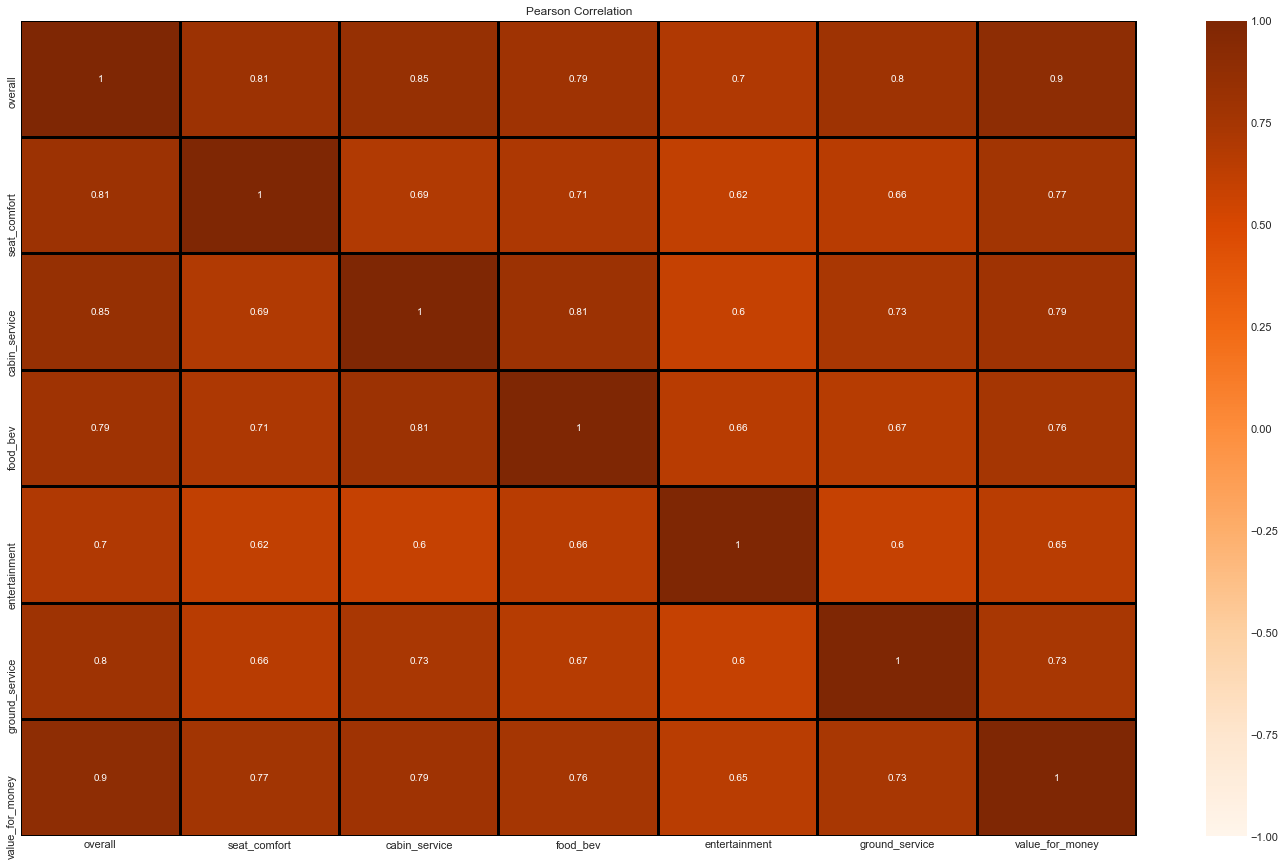

In [236]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_Pearson = data.corr(method='pearson')

figure = plt.figure(figsize=(25,15))
sns.heatmap(corr_Pearson,vmin=-1,vmax=+1,cmap='Oranges',annot=True, 
            linewidths=2,linecolor = 'black')
plt.title('Pearson Correlation')
plt.show()

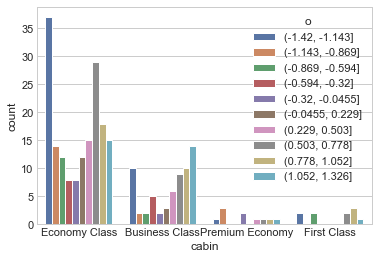

In [237]:
#for economy class maximum overall rating is 0.991,1.9
import seaborn as sns
sns.countplot(x='cabin', hue=pd.cut(data['overall'],10),data=data)
plt.legend(loc='upper right', title='o')

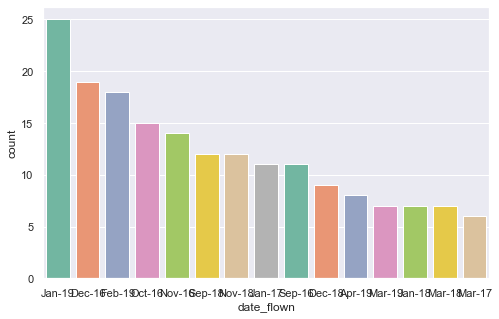

In [238]:
plt.figure(figsize=(8,5))
sns.set(style="darkgrid")
ax = sns.countplot(x="date_flown", data=data, palette="Set2", order=data['date_flown']
                   .value_counts().index[0:15])

In [239]:
data.groupby('date_flown')['airline'].agg('count').sort_values()

date_flown
Jul-16     1
Oct-15     1
Nov-15     1
Nov-17     2
May-18     2
Mar-16     2
Jun-18     2
Jul-18     2
Feb-17     2
Apr-16     2
Apr-17     2
Aug-17     2
Dec-17     3
Dec-15     3
Feb-18     3
Jan-16     3
Aug-15     3
Sep-17     3
Aug-18     3
Jun-17     4
May-16     4
Oct-18     5
Oct-17     5
Apr-18     5
Aug-16     5
Mar-17     6
Mar-19     7
Jan-18     7
Mar-18     7
Apr-19     8
Dec-18     9
Jan-17    11
Sep-16    11
Nov-18    12
Sep-18    12
Nov-16    14
Oct-16    15
Feb-19    18
Dec-16    19
Jan-19    25
Name: airline, dtype: int64

In [240]:
airline_counts = pd.DataFrame(data["airline"].value_counts())
print(airline_counts)
airline_counts.sort_values("airline", ascending=False)

                   airline
Turkish Airlines        65
American Airlines       47
Austrian Airlines       40
Air Canada              28
Air India               22
Qantas Airways          17
flydubai                13
United Airlines         13
British Airways          4
Frontier Airlines        2


,airline
Turkish Airlines,65
American Airlines,47
Austrian Airlines,40
Air Canada,28
Air India,22
Qantas Airways,17
flydubai,13
United Airlines,13
British Airways,4
Frontier Airlines,2


In [241]:
# list of numerical variables
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
data[numerical_features].head()# visualise the numerical variables

Number of numerical variables:  7


,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
0,1.326208,0.605564,1.099357,1.303510,1.310248,1.232014,1.216687
1,-1.112460,-0.104700,-0.166416,-0.711979,-0.098198,-1.428076,-0.762072
2,0.106874,-0.814965,-0.166416,-0.040149,-0.098198,-0.098031,-0.102485
3,-1.417294,-1.525230,-1.432190,-1.383808,-1.506645,-1.428076,-1.421658
4,-1.112460,-1.525230,-0.166416,-0.711979,-0.802422,-1.428076,-1.421658


In [242]:
data['id_cus'] = data.groupby(['author']).ngroup()

In [243]:
data['airline_id'] = data[['airline']]

In [244]:
col = ['airline_id']
le= LabelEncoder()
data[col] = data[col].apply(le.fit_transform)

In [245]:
airline_features_df=data.pivot_table(index='airline',columns='id_cus',values='overall').fillna(0)
airline_features_df.head()

id_cus,0,1,2,3,4,5,6,7,8,9,...,225,226,227,228,229,230,231,232,233,234
airline,,,,,,,,,,,,,,,,,,,,,
Air Canada,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1.021374,0.0,...,1.326208,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
Air India,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.00000,0.716541,0.000000,0.0,0.0,0.000000,0.0,0.0
American Airlines,-1.11246,0.0,-1.417294,0.0,0.000000,0.000000,0.0,1.021374,0.000000,0.0,...,0.000000,0.0,0.00000,0.000000,0.411707,0.0,0.0,-1.417294,0.0,0.0
Austrian Airlines,0.00000,0.0,0.000000,0.0,0.411707,0.411707,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,-0.19796,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
British Airways,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0


In [246]:
# airline_features_df1=data.pivot_table(index='airline',columns='id_cus',values='food_bev').fillna(0)
# airline_features_df1.head()

In [247]:
#for getting faster result used csr
from scipy.sparse import csr_matrix
airline_features_df_matrix = csr_matrix(airline_features_df.values)
from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(airline_features_df_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [248]:
query_index = np.random.choice(airline_features_df.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(airline_features_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

7


In [249]:
# function is used to get a copy of an given array collapsed into one dimension.
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(airline_features_df.index[query_index]))
    else:
        print('{0}: {1}'.format(i, airline_features_df.index[indices.flatten()[i]], distances.flatten()[i]))
        

Recommendations for Turkish Airlines:

1: Air Canada
2: Qantas Airways
3: United Airlines
4: British Airways
5: Frontier Airlines


In [ ]:
model_knn.summary()

In [250]:
# from scipy.sparse import csr_matrix
# airline_features_df_matrix = csr_matrix(airline_features_df.values)
# from sklearn.neighbors import NearestNeighbors
# model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
# model_knn.fit(airline_features_df_matrix)
# y_pred=model_knn.predict(airline_features_df_matrix)
# print("Accuracy: ",accuracy_score(airline_features_df_matrix))

In [259]:
col = data.columns.tolist()
le= LabelEncoder()
data[col] =data[col].apply(le.fit_transform)

In [260]:
from sklearn.datasets import make_classification
X = data.drop(['recommended'], axis=1)
y = data['recommended']

In [288]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state = 42)

In [289]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score
model = KNeighborsClassifier(metric = 'cosine', algorithm = 'brute')
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))

Accuracy:  0.7692307692307693
